In [ ]:
import pandas as pd


df = pd.read_parquet('cleaned_log_export.parquet')


df.head()


,timestamp,source_ip,destination_ip,protocol,destination_port,action,firewall_rule,interface_in,interface_out
0,2024-03-20 01:29:24,94.102.61.47,159.84.146.99,TCP,3178,DENY,999,eth0,Unknown
1,2024-03-20 01:29:25,176.111.174.85,159.84.146.99,TCP,2231,DENY,999,eth0,Unknown
2,2024-03-20 01:29:27,66.249.65.106,159.84.146.99,TCP,443,PERMIT,1,eth0,Unknown
3,2024-03-20 01:29:34,89.248.163.75,159.84.146.99,TCP,8845,DENY,999,eth0,Unknown
4,2024-03-20 01:29:38,42.58.163.244,159.84.146.99,TCP,23,DENY,7,eth0,Unknown


In [2]:
df.isnull().sum()

timestamp           0
source_ip           0
destination_ip      0
protocol            0
destination_port    0
action              0
firewall_rule       0
interface_in        0
interface_out       0
dtype: int64

In [2]:
from kmodes.kmodes import KModes


In [3]:

# Définition du nombre de clusters
k = 3  

# Création du modèle K-Modes avec initialisation "Huang" et 10 répétitions
km = KModes(n_clusters=k, init="Huang", n_init=5, verbose=1, random_state=42)

# Entraînement du modèle
clusters = km.fit_predict(df)

# Ajouter les labels de clusters au DataFrame original
df["Cluster"] = clusters

# Affichage des centres des clusters
print("Centres des clusters:", km.cluster_centroids_)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 24, cost: 29022480.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 29, cost: 29022480.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 29272266.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 33698542.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 3705, cost: 32716563.0
Best run was number 1
Centres des clusters: [[Timestamp('2024-12-06 00:50:09') '3.224.220.101' '159.84.146.99' 'TCP'
  443 'PERMIT' 1 'eth0' 'Unknown']
 [Timestamp('2024-12-06 00:50:09') '23.22.35.162' '159.84.146.99' 'TCP'
  443 'PERMIT' 1 'eth0' 'Unknown']
 [Timestamp('2024-05-19 01:02:17') '109.234.162.235' '159.84.146.99'
  'TCP'

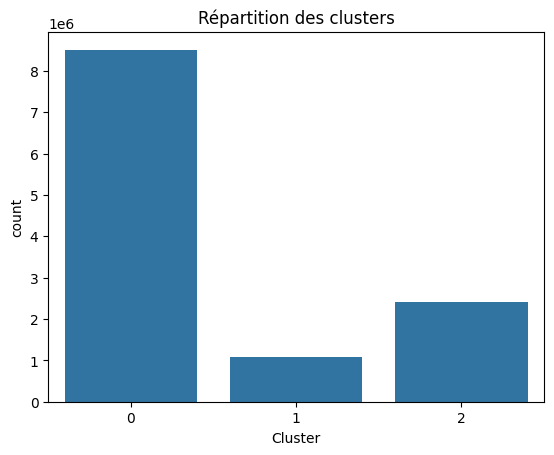

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Répartition des clusters
sns.countplot(x=df["Cluster"])
plt.title("Répartition des clusters")
plt.show()

In [ ]:
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=df["Cluster"], palette="viridis")
plt.title("Visualisation des clusters selon deux premières variables")
plt.xticks(rotation=45)
plt.show()